AcademIQ ML Models: Complete End-to-End Implementation
============================================================
Top 3 Priority Models:
1. Dropout Prediction
2. Performance Forecasting  
3. Bus ETA Prediction

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("Loading data...")

Loading data...


In [128]:
df_students.columns

Index(['student_id', 'user_id', 'admission_number', 'class_id',
       'date_of_admission', 'status', 'dropout_date', 'dropout_reason'],
      dtype='object')

In [80]:
# Base path
base_path = "/home/dataopske/Desktop/AcademIQ/database/data/"

# Load all CSVs into DataFrames
df_schools = pd.read_csv(base_path + 'schools.csv')
df_subjects = pd.read_csv(base_path + 'subjects.csv')
df_users = pd.read_csv(base_path + 'users.csv')
df_classes = pd.read_csv(base_path + 'classes.csv')
df_students = pd.read_csv(base_path + 'students.csv')
df_student_parents = pd.read_csv(base_path + 'student_parents.csv')
df_terms = pd.read_csv(base_path + 'terms.csv')
df_exams = pd.read_csv(base_path + 'exams.csv')
df_results = pd.read_csv(base_path + 'student_results.csv')
df_attendance = pd.read_csv(base_path + 'class_attendance.csv')
df_buses = pd.read_csv(base_path + 'buses.csv')
df_routes = pd.read_csv(base_path + 'routes.csv')
df_route_stops = pd.read_csv(base_path + 'route_stops.csv')
df_student_transport = pd.read_csv(base_path + 'student_transport.csv')
df_fee_payments = pd.read_csv(base_path + 'fee_payments.csv')
df_student_transport_logs = pd.read_csv(base_path + 'student_transport_logs.csv')

# Quick previews
print("Students:")
display(df_students.head())

print("Fee Payments:")
display(df_fee_payments.head())

print("Attendance:")
display(df_attendance.head())

print("Results:")
display(df_results.head())


Students:


,student_id,user_id,admission_number,class_id,date_of_admission,status,dropout_date,dropout_reason
0,a654b3c4-50e2-4e6f-a5ae-6a29204f3853,0a6cd3e0-0a85-4e72-b6fe-249c3b4b436c,LPS20200000,010e7eee-c3c6-4359-a62f-4c7148c1a317,2020-01-01,dropped_out,2024-09-18,Health issues
1,7419ed6c-b885-4696-beaf-107ba46d6ff6,1ad8c372-1440-4dc9-aeba-bf1223722922,LPS20200001,010e7eee-c3c6-4359-a62f-4c7148c1a317,2019-05-29,active,NaN,NaN
2,c6488898-8dcf-44fc-8838-274f632d8bc8,15a3fd12-3cf8-4d9d-97b5-8b6559480583,LPS20200002,010e7eee-c3c6-4359-a62f-4c7148c1a317,2019-05-29,active,NaN,NaN
3,899f4302-6616-44ef-9bcc-e554ef6b2f9e,2049eaf5-e4f3-4b34-81c9-e776ea4f8163,LPS20200003,010e7eee-c3c6-4359-a62f-4c7148c1a317,2019-02-23,active,NaN,NaN
4,48f71c24-143d-4acd-8ca1-9a7b3a844535,0635a719-04fb-45a9-abfc-9173068e7634,LPS20200004,010e7eee-c3c6-4359-a62f-4c7148c1a317,2019-11-12,active,NaN,NaN


Fee Payments:


,payment_id,student_id,term_id,amount_required,amount_paid,balance,payment_status,last_payment_date
0,2cd555b2-f948-4f49-b960-312e3866d289,a654b3c4-50e2-4e6f-a5ae-6a29204f3853,04f0b3fe-80c2-4d2d-9edc-2d7d63fe8bfc,15000.0,10654.37,4345.63,paid,2023-02-07
1,0bc80b5b-0f06-4660-90bd-686aee1d4a61,a654b3c4-50e2-4e6f-a5ae-6a29204f3853,0973de7f-2453-445c-b301-5b342cffee1e,15000.0,13301.15,1698.85,partial,2023-05-27
2,abb05808-9889-4859-aab7-3eaf05e1e95b,a654b3c4-50e2-4e6f-a5ae-6a29204f3853,813bb2a0-b305-42bd-9779-cc36fa0c5c7a,15000.0,13087.76,1912.24,paid,2023-10-04
3,a921e907-1e08-46d3-93a1-e630f378e372,a654b3c4-50e2-4e6f-a5ae-6a29204f3853,3a70bf49-bac3-4616-b371-42aa9fad103a,15000.0,12314.75,2685.25,paid,2024-01-30
4,3f849c22-50f4-4642-87d7-e3bb406d48f8,a654b3c4-50e2-4e6f-a5ae-6a29204f3853,8e397040-2590-4180-8ef2-878cf84ea9e2,15000.0,11184.49,3815.51,paid,2024-05-26


Attendance:


,attendance_id,student_id,class_id,date,term_id,status,recorded_at
0,aad91901-2d7f-4a2c-a48d-7a40b34cbb05,a654b3c4-50e2-4e6f-a5ae-6a29204f3853,010e7eee-c3c6-4359-a62f-4c7148c1a317,2023-01-09,04f0b3fe-80c2-4d2d-9edc-2d7d63fe8bfc,present,2023-01-09 08:30:00
1,7fe2adab-5b69-4aaf-9476-effc34447f2f,7419ed6c-b885-4696-beaf-107ba46d6ff6,010e7eee-c3c6-4359-a62f-4c7148c1a317,2023-01-09,04f0b3fe-80c2-4d2d-9edc-2d7d63fe8bfc,present,2023-01-09 08:30:00
2,a08772d2-a5cb-43c4-836e-2ae5300afd7f,c6488898-8dcf-44fc-8838-274f632d8bc8,010e7eee-c3c6-4359-a62f-4c7148c1a317,2023-01-09,04f0b3fe-80c2-4d2d-9edc-2d7d63fe8bfc,present,2023-01-09 08:30:00
3,7977ca88-2fb0-47ea-9b31-c6177991cecc,899f4302-6616-44ef-9bcc-e554ef6b2f9e,010e7eee-c3c6-4359-a62f-4c7148c1a317,2023-01-09,04f0b3fe-80c2-4d2d-9edc-2d7d63fe8bfc,present,2023-01-09 08:30:00
4,75e93615-5aa8-443f-885c-afdd9c314349,48f71c24-143d-4acd-8ca1-9a7b3a844535,010e7eee-c3c6-4359-a62f-4c7148c1a317,2023-01-09,04f0b3fe-80c2-4d2d-9edc-2d7d63fe8bfc,late,2023-01-09 08:30:00


Results:


,result_id,student_id,exam_id,subject_id,marks,class_mean,class_rank,recorded_at
0,efb03987-1d1a-47d8-934e-1fd435f99e5f,a654b3c4-50e2-4e6f-a5ae-6a29204f3853,0e5ad471-a4d9-40d0-8ed1-2dcd2e2186be,0babb39a-638e-4ed6-92cd-7cfe2c8125d0,85.3,66.8,3,2023-01-30
1,ec17189e-49aa-4ed5-a754-d9660a5b7c89,a654b3c4-50e2-4e6f-a5ae-6a29204f3853,db9f0c93-cff1-46e3-84df-4b5c0dcaa9c0,0babb39a-638e-4ed6-92cd-7cfe2c8125d0,62.0,66.5,21,2023-03-01
2,bc28bf18-bad2-4f71-b526-cecedde839fd,a654b3c4-50e2-4e6f-a5ae-6a29204f3853,33652d8d-fb88-402b-9820-523bb6e241ec,0babb39a-638e-4ed6-92cd-7cfe2c8125d0,84.9,67.9,3,2023-04-07
3,617b8333-de0d-4a47-971d-40502127bad5,a654b3c4-50e2-4e6f-a5ae-6a29204f3853,4bdcfb39-0e23-48c3-93f5-75f047f521da,0babb39a-638e-4ed6-92cd-7cfe2c8125d0,57.3,66.4,24,2023-05-29
4,e0cf0229-db12-43f5-9f4c-a0c941e7c457,a654b3c4-50e2-4e6f-a5ae-6a29204f3853,30bc2366-c783-4286-ad5f-625425aee963,0babb39a-638e-4ed6-92cd-7cfe2c8125d0,67.3,66.4,15,2023-06-28


### MODEL 1: DROPOUT PREDICTION


In [81]:
# Step 1: Join tables to create features
print("\n Step 1: Feature Engineering for Dropout Prediction")

# Start with students
dropout_df = df_students.copy()

# Convert dates
dropout_df['date_of_admission'] = pd.to_datetime(dropout_df['date_of_admission'])

# Create target variable
dropout_df['is_dropout'] = (dropout_df['status'] == 'dropped_out').astype(int)

print(f"Total students: {len(dropout_df)}")
print(f"Dropouts: {dropout_df['is_dropout'].sum()}")
print(f"Active: {(~dropout_df['is_dropout'].astype(bool)).sum()}")


 Step 1: Feature Engineering for Dropout Prediction
Total students: 360
Dropouts: 18
Active: 342


In [82]:
# Feature 1: Performance metrics from student_results

print("Joining student_results for performance features...")

# Calculate per-student performance aggregations
performance_features = df_results.groupby('student_id').agg({
    'marks': ['mean', 'std', 'min', 'max'],
    'class_mean': 'mean',
    'class_rank': 'mean',
    'result_id': 'count'  # Total exams taken
}).reset_index()

performance_features.columns = [
    'student_id', 'avg_marks', 'marks_std', 'min_marks', 'max_marks',
    'avg_class_mean', 'avg_rank', 'total_exams'
]

# Calculate deviation from class mean
performance_features['avg_deviation_from_mean'] = (
    performance_features['avg_marks'] - performance_features['avg_class_mean']
)

# Calculate performance trend (recent vs early performance)
# Get first 6 and last 6 exams for each student
df_results_sorted = df_results.merge(df_exams[['exam_id', 'exam_date']], on='exam_id')
df_results_sorted = df_results_sorted.sort_values(['student_id', 'exam_date'])

# Early performance (first 6 exams)
early_performance = df_results_sorted.groupby('student_id').head(6).groupby('student_id')['marks'].mean()
early_performance = early_performance.reset_index()
early_performance.columns = ['student_id', 'early_avg_marks']

# Recent performance (last 6 exams)
recent_performance = df_results_sorted.groupby('student_id').tail(6).groupby('student_id')['marks'].mean()
recent_performance = recent_performance.reset_index()
recent_performance.columns = ['student_id', 'recent_avg_marks']

# Merge performance trends
performance_features = performance_features.merge(early_performance, on='student_id', how='left')
performance_features = performance_features.merge(recent_performance, on='student_id', how='left')

# Calculate performance velocity (change over time)
performance_features['performance_velocity'] = (
    performance_features['recent_avg_marks'] - performance_features['early_avg_marks']
)
performance_features['is_declining'] = (performance_features['performance_velocity'] < -10).astype(int)

# Join to main dataframe
dropout_df = dropout_df.merge(performance_features, on='student_id', how='left')

print(f"Added {len(performance_features.columns)-1} performance features")

Joining student_results for performance features...
Added 12 performance features


In [83]:
dropout_df

,student_id,user_id,admission_number,class_id,date_of_admission,status,dropout_date,dropout_reason,is_dropout,avg_marks,...,min_marks,max_marks,avg_class_mean,avg_rank,total_exams,avg_deviation_from_mean,early_avg_marks,recent_avg_marks,performance_velocity,is_declining
0,a654b3c4-50e2-4e6f-a5ae-6a29204f3853,0a6cd3e0-0a85-4e72-b6fe-249c3b4b436c,LPS20200000,010e7eee-c3c6-4359-a62f-4c7148c1a317,2020-01-01,dropped_out,2024-09-18,Health issues,1,63.807639,...,47.8,88.1,67.753472,18.437500,144,-3.945833,82.750000,54.883333,-27.866667,1
1,7419ed6c-b885-4696-beaf-107ba46d6ff6,1ad8c372-1440-4dc9-aeba-bf1223722922,LPS20200001,010e7eee-c3c6-4359-a62f-4c7148c1a317,2019-05-29,active,NaN,NaN,0,56.211111,...,28.3,79.8,67.753472,23.298611,144,-11.542361,68.366667,59.066667,-9.300000,0
2,c6488898-8dcf-44fc-8838-274f632d8bc8,15a3fd12-3cf8-4d9d-97b5-8b6559480583,LPS20200002,010e7eee-c3c6-4359-a62f-4c7148c1a317,2019-05-29,active,NaN,NaN,0,83.575000,...,71.1,94.9,67.753472,3.791667,144,15.821528,85.566667,93.233333,7.666667,0
3,899f4302-6616-44ef-9bcc-e554ef6b2f9e,2049eaf5-e4f3-4b34-81c9-e776ea4f8163,LPS20200003,010e7eee-c3c6-4359-a62f-4c7148c1a317,2019-02-23,active,NaN,NaN,0,65.249306,...,41.8,85.1,67.753472,17.236111,144,-2.504167,71.766667,56.383333,-15.383333,1
4,48f71c24-143d-4acd-8ca1-9a7b3a844535,0635a719-04fb-45a9-abfc-9173068e7634,LPS20200004,010e7eee-c3c6-4359-a62f-4c7148c1a317,2019-11-12,active,NaN,NaN,0,67.234722,...,49.8,84.4,67.753472,15.652778,144,-0.518750,54.483333,66.200000,11.716667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,b5b1ee17-8f8b-4d37-b0d8-c1ad2ea706d7,ca6f557b-0ef2-4ace-bf80-32dc50ed5bde,LPS20251125,0c9646eb-4872-4a38-9eba-a1864c462f10,2019-04-27,active,NaN,NaN,0,68.292361,...,47.6,95.3,67.193056,15.041667,144,1.099306,53.050000,70.550000,17.500000,0
356,27568949-a40b-40e5-b8ca-7b4f814398e6,9f06e80c-f91f-4030-a76b-15837de6a5b6,LPS20251126,0c9646eb-4872-4a38-9eba-a1864c462f10,2019-08-11,active,NaN,NaN,0,66.313889,...,41.3,87.0,67.193056,16.145833,144,-0.879167,60.966667,80.850000,19.883333,0
357,9f318888-11e0-4956-80a7-f2f03bfe65b4,fb6dc0ca-a8da-4cdd-9c6d-adbccc806309,LPS20251127,0c9646eb-4872-4a38-9eba-a1864c462f10,2019-03-10,active,NaN,NaN,0,64.175694,...,37.1,85.4,67.193056,17.194444,144,-3.017361,69.516667,75.200000,5.683333,0
358,e4e41400-27a2-4c26-9e8d-1340fdd87548,4b7a66f2-481e-4a99-b061-61ef8e39b66e,LPS20251128,0c9646eb-4872-4a38-9eba-a1864c462f10,2019-11-21,active,NaN,NaN,0,58.743750,...,33.0,74.2,67.193056,21.312500,144,-8.449306,67.783333,38.733333,-29.050000,1


In [84]:
# Feature 2: Attendance metrics from class_attendance

print("Joining class_attendance for attendance features...")

# Calculate attendance rate per student
attendance_summary = df_attendance.groupby('student_id').agg({
    'attendance_id': 'count',  # Total attendance records
    'status': lambda x: (x == 'present').sum()  # Days present
}).reset_index()

attendance_summary.columns = ['student_id', 'total_days', 'days_present']
attendance_summary['attendance_rate'] = (
    attendance_summary['days_present'] / attendance_summary['total_days'] * 100
)

# Calculate recent attendance (last term)
df_attendance_dated = df_attendance.merge(df_terms[['term_id', 'start_date']], on='term_id')
df_attendance_dated['date'] = pd.to_datetime(df_attendance_dated['date'])

# Get most recent term
latest_term_id = df_terms.sort_values('start_date', ascending=False).iloc[0]['term_id']
recent_attendance = df_attendance[df_attendance['term_id'] == latest_term_id].groupby('student_id').agg({
    'attendance_id': 'count',
    'status': lambda x: (x == 'present').sum()
}).reset_index()

recent_attendance.columns = ['student_id', 'recent_total_days', 'recent_days_present']
recent_attendance['recent_attendance_rate'] = (
    recent_attendance['recent_days_present'] / recent_attendance['recent_total_days'] * 100
)

# Calculate consecutive absences
df_attendance_sorted = df_attendance.sort_values(['student_id', 'date'])
df_attendance_sorted['is_absent'] = (df_attendance_sorted['status'] == 'absent').astype(int)

def max_consecutive_absences(group):
    absences = group['is_absent'].tolist()
    max_streak = 0
    current_streak = 0
    for absent in absences:
        if absent:
            current_streak += 1
            max_streak = max(max_streak, current_streak)
        else:
            current_streak = 0
    return max_streak

consecutive_absences = df_attendance_sorted.groupby('student_id').apply(
    max_consecutive_absences
).reset_index()
consecutive_absences.columns = ['student_id', 'max_consecutive_absences']

# Merge attendance features
dropout_df = dropout_df.merge(attendance_summary[['student_id', 'attendance_rate']], on='student_id', how='left')
dropout_df = dropout_df.merge(recent_attendance[['student_id', 'recent_attendance_rate']], on='student_id', how='left')
dropout_df = dropout_df.merge(consecutive_absences, on='student_id', how='left')

# Calculate attendance decline
dropout_df['attendance_decline'] = dropout_df['attendance_rate'] - dropout_df['recent_attendance_rate']

print(f"Added attendance features")

Joining class_attendance for attendance features...
Added attendance features


In [85]:
dropout_df

,student_id,user_id,admission_number,class_id,date_of_admission,status,dropout_date,dropout_reason,is_dropout,avg_marks,...,total_exams,avg_deviation_from_mean,early_avg_marks,recent_avg_marks,performance_velocity,is_declining,attendance_rate,recent_attendance_rate,max_consecutive_absences,attendance_decline
0,a654b3c4-50e2-4e6f-a5ae-6a29204f3853,0a6cd3e0-0a85-4e72-b6fe-249c3b4b436c,LPS20200000,010e7eee-c3c6-4359-a62f-4c7148c1a317,2020-01-01,dropped_out,2024-09-18,Health issues,1,63.807639,...,144,-3.945833,82.750000,54.883333,-27.866667,1,82.0,80.000000,3,2.000000
1,7419ed6c-b885-4696-beaf-107ba46d6ff6,1ad8c372-1440-4dc9-aeba-bf1223722922,LPS20200001,010e7eee-c3c6-4359-a62f-4c7148c1a317,2019-05-29,active,NaN,NaN,0,56.211111,...,144,-11.542361,68.366667,59.066667,-9.300000,0,67.6,70.769231,4,-3.169231
2,c6488898-8dcf-44fc-8838-274f632d8bc8,15a3fd12-3cf8-4d9d-97b5-8b6559480583,LPS20200002,010e7eee-c3c6-4359-a62f-4c7148c1a317,2019-05-29,active,NaN,NaN,0,83.575000,...,144,15.821528,85.566667,93.233333,7.666667,0,98.0,96.923077,1,1.076923
3,899f4302-6616-44ef-9bcc-e554ef6b2f9e,2049eaf5-e4f3-4b34-81c9-e776ea4f8163,LPS20200003,010e7eee-c3c6-4359-a62f-4c7148c1a317,2019-02-23,active,NaN,NaN,0,65.249306,...,144,-2.504167,71.766667,56.383333,-15.383333,1,89.8,89.230769,2,0.569231
4,48f71c24-143d-4acd-8ca1-9a7b3a844535,0635a719-04fb-45a9-abfc-9173068e7634,LPS20200004,010e7eee-c3c6-4359-a62f-4c7148c1a317,2019-11-12,active,NaN,NaN,0,67.234722,...,144,-0.518750,54.483333,66.200000,11.716667,0,92.8,93.846154,2,-1.046154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,b5b1ee17-8f8b-4d37-b0d8-c1ad2ea706d7,ca6f557b-0ef2-4ace-bf80-32dc50ed5bde,LPS20251125,0c9646eb-4872-4a38-9eba-a1864c462f10,2019-04-27,active,NaN,NaN,0,68.292361,...,144,1.099306,53.050000,70.550000,17.500000,0,91.2,92.307692,2,-1.107692
356,27568949-a40b-40e5-b8ca-7b4f814398e6,9f06e80c-f91f-4030-a76b-15837de6a5b6,LPS20251126,0c9646eb-4872-4a38-9eba-a1864c462f10,2019-08-11,active,NaN,NaN,0,66.313889,...,144,-0.879167,60.966667,80.850000,19.883333,0,90.6,84.615385,3,5.984615
357,9f318888-11e0-4956-80a7-f2f03bfe65b4,fb6dc0ca-a8da-4cdd-9c6d-adbccc806309,LPS20251127,0c9646eb-4872-4a38-9eba-a1864c462f10,2019-03-10,active,NaN,NaN,0,64.175694,...,144,-3.017361,69.516667,75.200000,5.683333,0,92.6,93.846154,2,-1.246154
358,e4e41400-27a2-4c26-9e8d-1340fdd87548,4b7a66f2-481e-4a99-b061-61ef8e39b66e,LPS20251128,0c9646eb-4872-4a38-9eba-a1864c462f10,2019-11-21,active,NaN,NaN,0,58.743750,...,144,-8.449306,67.783333,38.733333,-29.050000,1,71.8,80.000000,3,-8.200000


In [86]:
# Feature 3: Fee payment status from fee_payments

print("Joining fee_payments for financial features...")

# Calculate total balance and payment behavior
fee_summary = df_fee_payments.groupby('student_id').agg({
    'balance': ['sum', 'mean', 'max'],
    'amount_paid': 'sum',
    'payment_id': 'count',
    'payment_status': lambda x: (x == 'unpaid').sum()  # Count unpaid terms
}).reset_index()

fee_summary.columns = [
    'student_id', 'total_balance', 'avg_balance', 'max_balance',
    'total_paid', 'total_terms', 'unpaid_terms'
]

# Calculate payment completion rate
fee_summary['payment_completion_rate'] = (
    (fee_summary['total_terms'] - fee_summary['unpaid_terms']) / fee_summary['total_terms'] * 100
)

# Recent payment status (last 2 terms)
recent_terms = df_terms.sort_values('start_date', ascending=False).head(2)['term_id'].tolist()
recent_fees = df_fee_payments[df_fee_payments['term_id'].isin(recent_terms)]
recent_fee_summary = recent_fees.groupby('student_id')['balance'].sum().reset_index()
recent_fee_summary.columns = ['student_id', 'recent_balance']

# Merge fee features
dropout_df = dropout_df.merge(fee_summary, on='student_id', how='left')
dropout_df = dropout_df.merge(recent_fee_summary, on='student_id', how='left')

print(f"Added fee payment features")

Joining fee_payments for financial features...
Added fee payment features


In [87]:
# Feature 4: Class information

print(" Joining classes for demographic features...")

dropout_df = dropout_df.merge(df_classes[['class_id', 'grade_level']], on='class_id', how='left')

print(f"Added class features")

 Joining classes for demographic features...
Added class features


In [88]:
# Step 2: Handle missing values and prepare final feature set

print("Step 2: Preparing final feature set")

# Fill missing values (some students might not have all data)
dropout_df = dropout_df.fillna({
    'avg_marks': 50,
    'marks_std': 10,
    'avg_rank': 15,
    'total_exams': 0,
    'performance_velocity': 0,
    'is_declining': 0,
    'attendance_rate': 85,
    'recent_attendance_rate': 85,
    'max_consecutive_absences': 0,
    'attendance_decline': 0,
    'total_balance': 0,
    'avg_balance': 0,
    'payment_completion_rate': 100,
    'recent_balance': 0,
    'unpaid_terms': 0
})

Step 2: Preparing final feature set


In [89]:
# Select features for modeling
feature_columns = [
    'avg_marks', 'marks_std', 'min_marks', 'max_marks',
    'avg_deviation_from_mean', 'performance_velocity', 'is_declining',
    'attendance_rate', 'recent_attendance_rate', 'max_consecutive_absences', 'attendance_decline',
    'total_balance', 'avg_balance', 'payment_completion_rate', 'recent_balance', 'unpaid_terms',
    'grade_level', 'total_exams'
]

X = dropout_df[feature_columns]
y = dropout_df['is_dropout']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")

# Display feature statistics
print("\nFeature statistics:")
print(X.describe().T)


Feature matrix shape: (360, 18)
Target distribution:
is_dropout
0    342
1     18
Name: count, dtype: int64

Feature statistics:
                          count          mean           std          min  \
avg_marks                 360.0     67.970829      8.100442    55.899306   
marks_std                 360.0      8.441472      2.130576     3.951141   
min_marks                 360.0     48.305000     12.408954    20.600000   
max_marks                 360.0     87.936389      6.203560    71.400000   
avg_deviation_from_mean   360.0      0.000691      7.926062   -14.170833   
performance_velocity      360.0      1.925972     18.282907   -41.283333   
is_declining              360.0      0.283333      0.451244     0.000000   
attendance_rate           360.0     88.636111      8.332273    64.400000   
recent_attendance_rate    360.0     88.611111      8.766481    60.000000   
max_consecutive_absences  360.0      2.030556      0.902895     1.000000   
attendance_decline        360.0   

In [90]:
# Step 3: Train-Test Split

print("Step 3: Train-Test Split")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")
print(f"Train dropouts: {y_train.sum()}")
print(f"Test dropouts: {y_test.sum()}")

Step 3: Train-Test Split
Training set: 288 samples
Test set: 72 samples
Train dropouts: 14
Test dropouts: 4


In [91]:
# Step 4: Train Model

print("Step 4: Training Random Forest Classifier")

# Train Random Forest
rf_dropout = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced'  # Handle class imbalance
)

rf_dropout.fit(X_train, y_train)

print("Model trained successfully!")

Step 4: Training Random Forest Classifier
Model trained successfully!


Step 5: Model Evaluation

Classification Report:
              precision    recall  f1-score   support

      Active       0.94      1.00      0.97        68
     Dropout       0.00      0.00      0.00         4

    accuracy                           0.94        72
   macro avg       0.47      0.50      0.49        72
weighted avg       0.89      0.94      0.92        72


ROC-AUC Score: 0.3272

Confusion Matrix:
[[68  0]
 [ 4  0]]

Top 10 Most Important Features:
                    feature  importance
1                 marks_std    0.106429
5      performance_velocity    0.100669
11            total_balance    0.094242
7           attendance_rate    0.093302
14           recent_balance    0.087364
4   avg_deviation_from_mean    0.080217
3                 max_marks    0.071740
0                 avg_marks    0.064514
8    recent_attendance_rate    0.060390
12              avg_balance    0.059975
Saved feature importance plot


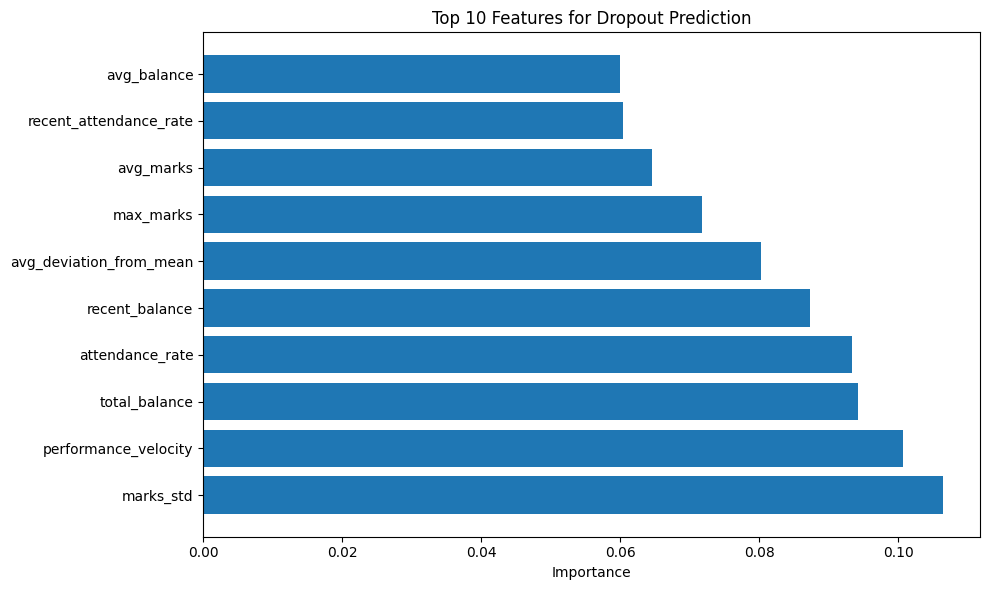

In [92]:
# Step 5: Evaluate Model

print("Step 5: Model Evaluation")

# Predictions
y_pred = rf_dropout.predict(X_test)
y_pred_proba = rf_dropout.predict_proba(X_test)[:, 1]

# Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Active', 'Dropout']))

print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_dropout.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'].head(10), feature_importance['importance'].head(10))
plt.xlabel('Importance')
plt.title('Top 10 Features for Dropout Prediction')
plt.tight_layout()
plt.savefig('dropout_feature_importance.png', dpi=300, bbox_inches='tight')
print("Saved feature importance plot")

In [93]:

# Step 6: Generate Predictions for All Students

print("Step 6: Generating Risk Scores for All Students")

# Predict for all students
dropout_df['dropout_risk_score'] = rf_dropout.predict_proba(X)[:, 1]
dropout_df['dropout_prediction'] = rf_dropout.predict(X)

# Categorize risk
def categorize_risk(score):
    if score < 0.3:
        return 'Low'
    elif score < 0.6:
        return 'Medium'
    else:
        return 'High'

dropout_df['risk_category'] = dropout_df['dropout_risk_score'].apply(categorize_risk)

# Get student names
dropout_df = dropout_df.merge(
    df_users[['user_id', 'first_name', 'last_name']], 
    left_on='user_id', 
    right_on='user_id',
    how='left'
)

# High-risk students
high_risk_students = dropout_df[dropout_df['risk_category'] == 'High'].sort_values(
    'dropout_risk_score', ascending=False
)

print(f"\n🚨 High Risk Students: {len(high_risk_students)}")
print("\nTop 10 At-Risk Students:")
print(high_risk_students[[
    'first_name', 'last_name', 'dropout_risk_score', 'avg_marks', 
    'attendance_rate', 'total_balance'
]].head(10).to_string(index=False))

# Save predictions
dropout_df[['student_id', 'first_name', 'last_name', 'dropout_risk_score', 
            'risk_category', 'avg_marks', 'attendance_rate', 'total_balance']].to_csv(
    'dropout_predictions.csv', index=False
)
print("\n✅ Saved predictions to 'dropout_predictions.csv'")

Step 6: Generating Risk Scores for All Students

🚨 High Risk Students: 10

Top 10 At-Risk Students:
 first_name last_name  dropout_risk_score  avg_marks  attendance_rate  total_balance
  Catherine     Gibbs            0.720809  62.636806             78.6       29994.45
        Amy    Nguyen            0.694737  83.573611             95.6        9815.61
      Shawn  Santiago            0.681654  62.897917             78.8       28125.43
      Brent      Kidd            0.660756  56.883333             72.8       57594.79
 Jacqueline   Farrell            0.644925  65.233333             91.8       11045.50
     Andrea   Daniels            0.640560  83.950694             96.6        9625.32
      Sonya    Barnes            0.632121  61.469444             78.2       28023.25
  Elizabeth     Lewis            0.623576  58.113889             72.4       61431.84
Christopher      Hall            0.615709  63.807639             82.0       27610.17
      Donna     Moore            0.604919  61.0895

### MODEL 2: PERFORMANCE FORECASTING

In [94]:
# Step 1: Create time-series features for performance prediction

print("Step 1: Feature Engineering for Performance Forecasting")

# Join results with exams to get dates
df_results_ts = df_results.merge(df_exams[['exam_id', 'exam_date', 'exam_type', 'term_id']], on='exam_id')
df_results_ts = df_results_ts.merge(df_terms[['term_id', 'year', 'term_number']], on='term_id')
df_results_ts['exam_date'] = pd.to_datetime(df_results_ts['exam_date'])

# Sort by student and date
df_results_ts = df_results_ts.sort_values(['student_id', 'subject_id', 'exam_date'])

print(f"Total result records: {len(df_results_ts)}")

# Step 2: Create lagged features (past performance)

print("Step 2: Creating Lagged Performance Features")

# For each student-subject combination, create lag features
performance_forecast_data = []

for (student_id, subject_id), group in df_results_ts.groupby(['student_id', 'subject_id']):
    group = group.sort_values('exam_date').reset_index(drop=True)
    
    # Need at least 4 exams to predict the next one (3 for features, 1 for target)
    if len(group) < 4:
        continue
    
    for i in range(3, len(group)):  # Start from 4th exam
        # Features: last 3 exam marks
        lag_1 = group.loc[i-1, 'marks']
        lag_2 = group.loc[i-2, 'marks']
        lag_3 = group.loc[i-3, 'marks']
        
        # Rolling statistics
        rolling_mean = group.loc[i-3:i-1, 'marks'].mean()
        rolling_std = group.loc[i-3:i-1, 'marks'].std()
        
        # Trend (velocity)
        marks_velocity = lag_1 - lag_3
        
        # Current exam info
        exam_type = group.loc[i, 'exam_type']
        class_mean = group.loc[i-1, 'class_mean']  # Previous class mean as context
        
        # Target: current exam marks
        target = group.loc[i, 'marks']
        
        performance_forecast_data.append({
            'student_id': student_id,
            'subject_id': subject_id,
            'exam_id': group.loc[i, 'exam_id'],
            'lag_1_marks': lag_1,
            'lag_2_marks': lag_2,
            'lag_3_marks': lag_3,
            'rolling_mean_3': rolling_mean,
            'rolling_std_3': rolling_std,
            'marks_velocity': marks_velocity,
            'prev_class_mean': class_mean,
            'exam_type': exam_type,
            'target_marks': target
        })

df_forecast = pd.DataFrame(performance_forecast_data)

print(f"Created {len(df_forecast)} training samples for forecasting")

Step 1: Feature Engineering for Performance Forecasting
Total result records: 51840
Step 2: Creating Lagged Performance Features
Created 45360 training samples for forecasting


In [95]:
# Step 3: Add attendance features for context

print("Step 3: Adding Attendance Context")

# Get attendance rate per student
student_attendance = df_attendance.groupby('student_id').agg({
    'status': lambda x: (x == 'present').sum() / len(x) * 100
}).reset_index()
student_attendance.columns = ['student_id', 'attendance_rate']

df_forecast = df_forecast.merge(student_attendance, on='student_id', how='left')
df_forecast['attendance_rate'] = df_forecast['attendance_rate'].fillna(85)

print(f"Added attendance context")

Step 3: Adding Attendance Context
Added attendance context


In [96]:
# Step 4: Encode categorical variables

print("Step 4: Encoding Categorical Variables")

# One-hot encode exam_type
df_forecast = pd.get_dummies(df_forecast, columns=['exam_type'], prefix='exam')

print(f"Final feature set shape: {df_forecast.shape}")

Step 4: Encoding Categorical Variables
Final feature set shape: (45360, 15)


In [97]:
# Step 5: Prepare features and target

print("Step 5: Preparing Feature Matrix")

feature_cols_forecast = [
    'lag_1_marks', 'lag_2_marks', 'lag_3_marks',
    'rolling_mean_3', 'rolling_std_3', 'marks_velocity',
    'prev_class_mean', 'attendance_rate'
]

# Add exam type columns (they were one-hot encoded)
exam_type_cols = [col for col in df_forecast.columns if col.startswith('exam_')]
feature_cols_forecast.extend(exam_type_cols)

X_forecast = df_forecast[feature_cols_forecast].fillna(0)
y_forecast = df_forecast['target_marks']

print(f"Feature matrix: {X_forecast.shape}")
print(f"Target variable: {y_forecast.shape}")

Step 5: Preparing Feature Matrix
Feature matrix: (45360, 12)
Target variable: (45360,)


In [98]:
# Step 6: Train-Test Split

print("Step 6: Train-Test Split")

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X_forecast, y_forecast, test_size=0.2, random_state=42
)

print(f"Training set: {len(X_train_f)}")
print(f"Test set: {len(X_test_f)}")

Step 6: Train-Test Split
Training set: 36288
Test set: 9072


In [99]:
X_train_f.drop(columns='exam_id', inplace=True, errors='ignore')
X_test_f.drop(columns='exam_id', inplace=True, errors='ignore')

In [100]:
X_train_f

,lag_1_marks,lag_2_marks,lag_3_marks,rolling_mean_3,rolling_std_3,marks_velocity,prev_class_mean,attendance_rate,exam_endterm,exam_midterm,exam_opener
14163,92.9,89.6,81.7,88.066667,5.755287,11.2,70.0,97.6,False,False,True
4342,88.6,79.6,77.0,81.733333,6.087145,11.6,67.1,96.8,False,True,False
4998,48.9,59.4,47.0,51.766667,6.678573,1.9,67.2,92.4,False,False,True
20210,68.3,42.6,67.6,59.500000,14.640014,0.7,71.2,92.6,True,False,False
6898,59.7,64.8,70.3,64.933333,5.301258,-10.6,67.0,92.4,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
11284,63.9,63.7,66.0,64.533333,1.274101,-2.1,67.4,78.6,False,True,False
44732,64.4,70.6,60.2,65.066667,5.231953,4.2,64.3,90.8,True,False,False
38158,76.8,59.5,67.5,67.933333,8.658137,9.3,69.1,78.8,False,True,False
860,74.1,76.5,78.1,76.233333,2.013289,-4.0,65.5,91.4,True,False,False


In [101]:
# Step 7: Train Model

print("\nStep 7: Training Gradient Boosting Regressor")

gb_forecast = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

gb_forecast.fit(X_train_f, y_train_f)

print("Model trained successfully!")


Step 7: Training Gradient Boosting Regressor
Model trained successfully!


In [102]:
# Step 8: Evaluate Model

print("Step 8: Model Evaluation")

# Predictions
y_pred_f = gb_forecast.predict(X_test_f)

# Metrics
mae = mean_absolute_error(y_test_f, y_pred_f)
rmse = np.sqrt(mean_squared_error(y_test_f, y_pred_f))
r2 = r2_score(y_test_f, y_pred_f)

print(f"\nMean Absolute Error: {mae:.2f} marks")
print(f"Root Mean Squared Error: {rmse:.2f} marks")
print(f"R² Score: {r2:.4f}")

print(f"\nInterpretation: On average, predictions are off by ±{mae:.1f} marks")

Step 8: Model Evaluation

Mean Absolute Error: 6.13 marks
Root Mean Squared Error: 7.97 marks
R² Score: 0.5601

Interpretation: On average, predictions are off by ±6.1 marks


Saved prediction plot


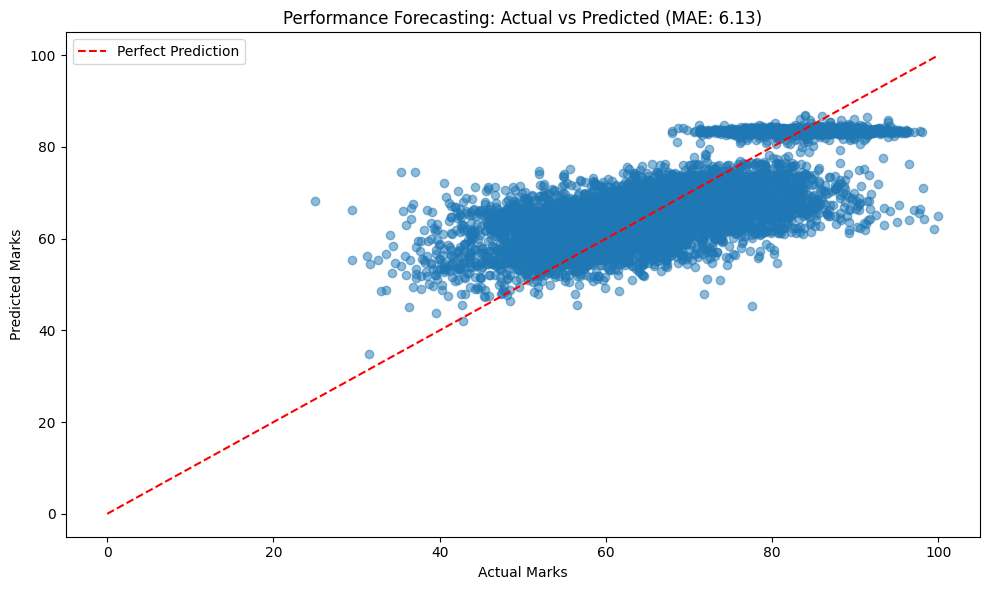

In [103]:
# Prediction vs Actual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_f, y_pred_f, alpha=0.5)
plt.plot([0, 100], [0, 100], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.title(f'Performance Forecasting: Actual vs Predicted (MAE: {mae:.2f})')
plt.legend()
plt.tight_layout()
plt.savefig('performance_forecast_accuracy.png', dpi=300, bbox_inches='tight')
print("Saved prediction plot")

In [104]:
print(len(X_forecast.columns), "columns in X_forecast")
print(len(feature_cols_forecast), "columns in feature_cols_forecast")
print(len(gb_forecast.feature_importances_), "importances from model")

12 columns in X_forecast
12 columns in feature_cols_forecast
11 importances from model


In [105]:
gb_forecast.feature_importances_

# Feature Importance
feature_importance_f = pd.DataFrame({
    'feature': X_train_f.columns[:len(gb_forecast.feature_importances_)],
    'importance': gb_forecast.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance_f.head(10))


Top 10 Most Important Features:
           feature  importance
3   rolling_mean_3    0.810173
7  attendance_rate    0.122267
4    rolling_std_3    0.014675
6  prev_class_mean    0.012026
1      lag_2_marks    0.010065
2      lag_3_marks    0.008611
0      lag_1_marks    0.008117
5   marks_velocity    0.007889
8     exam_endterm    0.002735
9     exam_midterm    0.002120


In [106]:
# Step 9: Generate Next Exam Predictions

print("Step 9: Predicting Next Exam Performance")

# For each student's most recent 3 exams, predict next performance
latest_predictions = []

for (student_id, subject_id), group in df_results_ts.groupby(['student_id', 'subject_id']):
    group = group.sort_values('exam_date').tail(3)  # Last 3 exams
    
    if len(group) < 3:
        continue
    
    # Create feature vector
    lag_1 = group.iloc[-1]['marks']
    lag_2 = group.iloc[-2]['marks']
    lag_3 = group.iloc[-3]['marks']
    rolling_mean = group['marks'].mean()
    rolling_std = group['marks'].std()
    marks_velocity = lag_1 - lag_3
    prev_class_mean = group.iloc[-1]['class_mean']
    
    # Get attendance
    att_rate = student_attendance[student_attendance['student_id'] == student_id]['attendance_rate'].values
    att_rate = att_rate[0] if len(att_rate) > 0 else 85
    
    # Assuming next exam is endterm (most common)
    features = {
        'lag_1_marks': lag_1,
        'lag_2_marks': lag_2,
        'lag_3_marks': lag_3,
        'rolling_mean_3': rolling_mean,
        'rolling_std_3': rolling_std,
        'marks_velocity': marks_velocity,
        'prev_class_mean': prev_class_mean,
        'attendance_rate': att_rate,
        'exam_endterm': 1,
        'exam_midterm': 0,
        'exam_opener': 0
    }
    
    # Ensure all features are present
    feature_vector = pd.DataFrame([features])
    for col in feature_cols_forecast:
        if col not in feature_vector.columns:
            feature_vector[col] = 0
    
    # feature_vector = feature_vector[feature_cols_forecast]
    # Keep only columns that model expects
    expected_features = gb_forecast.feature_names_in_
    feature_vector = feature_vector.reindex(columns=expected_features, fill_value=0)

    # Predict
    predicted_marks = gb_forecast.predict(feature_vector)[0]
    
    latest_predictions.append({
        'student_id': student_id,
        'subject_id': subject_id,
        'current_average': rolling_mean,
        'predicted_next_marks': round(predicted_marks, 1),
        'trend': 'improving' if marks_velocity > 5 else ('declining' if marks_velocity < -5 else 'stable')
    })

df_next_predictions = pd.DataFrame(latest_predictions)

# Add student names
df_next_predictions = df_next_predictions.merge(
    df_users[['user_id', 'first_name', 'last_name']],
    left_on=df_students.set_index('student_id').loc[df_next_predictions['student_id'], 'user_id'].values,
    right_on='user_id',
    how='left'
)

# Add subject names
df_next_predictions = df_next_predictions.merge(
    df_subjects[['subject_id', 'name']],
    on='subject_id',
    how='left'
)

# Students predicted to struggle (< 50%)
struggling_predictions = df_next_predictions[df_next_predictions['predicted_next_marks'] < 50]

print(f"Students Predicted to Struggle in Next Exam: {len(struggling_predictions)}")
print("Top 10 Students Needing Intervention:")
print(struggling_predictions.nsmallest(10, 'predicted_next_marks')[[
    'first_name', 'last_name', 'name', 'current_average', 'predicted_next_marks', 'trend'
]].to_string(index=False))

# Save predictions
df_next_predictions.to_csv('next_exam_predictions.csv', index=False)
print("Saved next exam predictions to 'next_exam_predictions.csv'")

Step 9: Predicting Next Exam Performance
Students Predicted to Struggle in Next Exam: 51
Top 10 Students Needing Intervention:
first_name  last_name                   name  current_average  predicted_next_marks     trend
     Brent       Kidd         Social Studies        38.333333                  39.8 declining
     Brent       Kidd            Mathematics        37.600000                  41.3 declining
   Rebecca   Mitchell                English        44.333333                  43.2 declining
     Diane     Walker              Kiswahili        43.533333                  43.3 declining
     Brent       Kidd              Kiswahili        38.000000                  43.6 declining
     Brent       Kidd Science and Technology        41.200000                  44.6 declining
     Debra Harrington              Kiswahili        47.266667                  45.1    stable
     Derek     Murray         Social Studies        43.333333                  45.6    stable
     Kevin     Oliver      

### MODEL 3: BUS ETA PREDICTION

In [107]:
# Step 1: Create historical trip data simulation

print("Step 1: Feature Engineering for Bus ETA")

# For this model, we need to simulate historical trip times
# In production, you'd have actual GPS tracking data

# Get route stops with cumulative time
route_eta_data = []

for route_id in df_routes['route_id'].unique():
    route_info = df_routes[df_routes['route_id'] == route_id].iloc[0]
    route_stops = df_route_stops[df_route_stops['route_id'] == route_id].sort_values('stop_order')
    
    # Calculate cumulative time from school
    cumulative_time = 0
    
    for idx, stop in route_stops.iterrows():
        cumulative_time += stop['time_from_prev_stop_min']
        
        # Simulate historical trips (5 trips per stop with variance)
        for trip_num in range(5):
            # Add realistic variance (traffic, delays)
            actual_time = cumulative_time + np.random.normal(0, 3)  # ±3 min variance
            
            route_eta_data.append({
                'route_id': route_id,
                'stop_id': stop['stop_id'],
                'stop_order': stop['stop_order'],
                'scheduled_time_min': cumulative_time,
                'actual_time_min': max(0, actual_time),
                'distance_from_school_km': route_stops[route_stops['stop_order'] <= stop['stop_order']]['time_from_prev_stop_min'].sum() * 0.5,  # Rough estimate
                'num_stops_before': stop['stop_order'] - 1,
                'time_of_day': np.random.choice(['morning', 'afternoon']),
                'day_of_week': np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
            })

df_eta = pd.DataFrame(route_eta_data)

print(f"Created {len(df_eta)} historical trip samples")

Step 1: Feature Engineering for Bus ETA
Created 275 historical trip samples


In [108]:
# Step 2: Feature Engineering

print("\nStep 2: Feature Engineering for ETA Prediction")

# Calculate delay from schedule
df_eta['delay_min'] = df_eta['actual_time_min'] - df_eta['scheduled_time_min']

# Encode categorical variables
df_eta['is_morning'] = (df_eta['time_of_day'] == 'morning').astype(int)
df_eta['is_afternoon'] = (df_eta['time_of_day'] == 'afternoon').astype(int)

# Day of week encoding (Monday=0, Friday=4)
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4}
df_eta['day_num'] = df_eta['day_of_week'].map(day_mapping)

# Calculate average delay per route (historical context)
route_avg_delay = df_eta.groupby('route_id')['delay_min'].mean().reset_index()
route_avg_delay.columns = ['route_id', 'route_avg_delay']
df_eta = df_eta.merge(route_avg_delay, on='route_id', how='left')

# Calculate average delay per stop order (earlier stops are more predictable)
stop_order_delay = df_eta.groupby('stop_order')['delay_min'].mean().reset_index()
stop_order_delay.columns = ['stop_order', 'stop_order_avg_delay']
df_eta = df_eta.merge(stop_order_delay, on='stop_order', how='left')

print(f"Feature engineering complete")
print(f"Features created: delay patterns, time encoding, route context")


Step 2: Feature Engineering for ETA Prediction
Feature engineering complete
Features created: delay patterns, time encoding, route context


In [109]:
# Step 3: Prepare features for modeling

print("Step 3: Preparing Feature Matrix for ETA Model")

feature_cols_eta = [
    'scheduled_time_min',
    'distance_from_school_km',
    'num_stops_before',
    'stop_order',
    'is_morning',
    'is_afternoon',
    'day_num',
    'route_avg_delay',
    'stop_order_avg_delay'
]

X_eta = df_eta[feature_cols_eta]
y_eta = df_eta['actual_time_min']

print(f"Feature matrix shape: {X_eta.shape}")
print(f"Target shape: {y_eta.shape}")

# Display feature statistics
print("\nFeature Statistics:")
print(X_eta.describe().T)

Step 3: Preparing Feature Matrix for ETA Model
Feature matrix shape: (275, 9)
Target shape: (275,)

Feature Statistics:
                         count       mean        std       min       25%  \
scheduled_time_min       275.0  23.381818  16.196209  0.000000  9.000000   
distance_from_school_km  275.0  11.690909   8.098105  0.000000  4.500000   
num_stops_before         275.0   2.963636   2.012403  0.000000  1.000000   
stop_order               275.0   3.963636   2.012403  1.000000  2.000000   
is_morning               275.0   0.429091   0.495849  0.000000  0.000000   
is_afternoon             275.0   0.570909   0.495849  0.000000  0.000000   
day_num                  275.0   2.014545   1.442248  0.000000  1.000000   
route_avg_delay          275.0   0.091062   0.252813 -0.191979 -0.191500   
stop_order_avg_delay     275.0   0.091062   0.683690 -1.257404 -0.586835   

                               50%        75%        max  
scheduled_time_min       22.000000  37.000000  54.000000  
d

In [110]:
# Step 4: Train-Test Split

print("Step 4: Train-Test Split for ETA Model")

X_train_eta, X_test_eta, y_train_eta, y_test_eta = train_test_split(
    X_eta, y_eta, test_size=0.2, random_state=42
)

print(f"Training set: {len(X_train_eta)} samples")
print(f"Test set: {len(X_test_eta)} samples")

Step 4: Train-Test Split for ETA Model
Training set: 220 samples
Test set: 55 samples


In [111]:
# Step 5: Train Model

print("Step 5: Training Random Forest Regressor for ETA")

rf_eta = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

rf_eta.fit(X_train_eta, y_train_eta)

print("ETA Model trained successfully!")

Step 5: Training Random Forest Regressor for ETA
ETA Model trained successfully!


In [112]:
# Step 6: Evaluate Model

print("Step 6: ETA Model Evaluation")

# Predictions
y_pred_eta = rf_eta.predict(X_test_eta)

# Metrics
mae_eta = mean_absolute_error(y_test_eta, y_pred_eta)
rmse_eta = np.sqrt(mean_squared_error(y_test_eta, y_pred_eta))
r2_eta = r2_score(y_test_eta, y_pred_eta)

print(f"\nMean Absolute Error: {mae_eta:.2f} minutes")
print(f"Root Mean Squared Error: {rmse_eta:.2f} minutes")
print(f"R² Score: {r2_eta:.4f}")

print(f"Interpretation: On average, ETA predictions are accurate within ±{mae_eta:.1f} minutes")

# Calculate prediction intervals (confidence ranges)
predictions_with_error = np.column_stack([
    y_pred_eta - 1.96 * rmse_eta,  # Lower bound (95% confidence)
    y_pred_eta,                      # Point estimate
    y_pred_eta + 1.96 * rmse_eta   # Upper bound (95% confidence)
])

Step 6: ETA Model Evaluation

Mean Absolute Error: 2.14 minutes
Root Mean Squared Error: 2.73 minutes
R² Score: 0.9676
Interpretation: On average, ETA predictions are accurate within ±2.1 minutes


Saved ETA evaluation plot


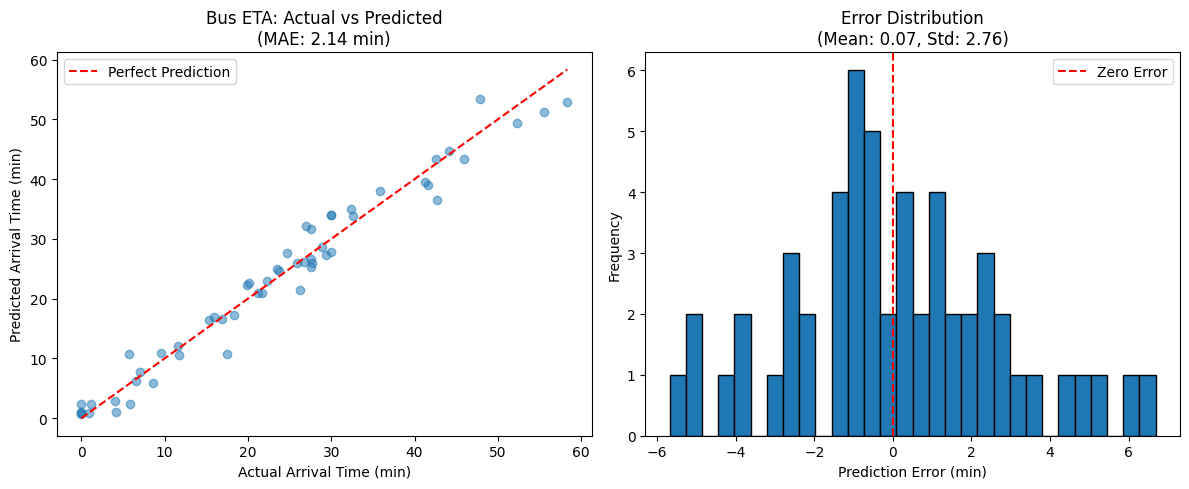

In [113]:
# Visualize predictions vs actual
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test_eta, y_pred_eta, alpha=0.5)
plt.plot([0, y_test_eta.max()], [0, y_test_eta.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Arrival Time (min)')
plt.ylabel('Predicted Arrival Time (min)')
plt.title(f'Bus ETA: Actual vs Predicted\n(MAE: {mae_eta:.2f} min)')
plt.legend()

plt.subplot(1, 2, 2)
residuals = y_test_eta - y_pred_eta
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Prediction Error (min)')
plt.ylabel('Frequency')
plt.title(f'Error Distribution\n(Mean: {residuals.mean():.2f}, Std: {residuals.std():.2f})')
plt.axvline(0, color='r', linestyle='--', label='Zero Error')
plt.legend()

plt.tight_layout()
plt.savefig('bus_eta_evaluation.png', dpi=300, bbox_inches='tight')
print("Saved ETA evaluation plot")


Feature Importance for ETA Prediction:
                   feature  importance
1  distance_from_school_km    0.511505
0       scheduled_time_min    0.475061
6                  day_num    0.005125
7          route_avg_delay    0.003099
2         num_stops_before    0.002086
4               is_morning    0.000888
5             is_afternoon    0.000792
8     stop_order_avg_delay    0.000725
3               stop_order    0.000719
Saved ETA feature importance plot


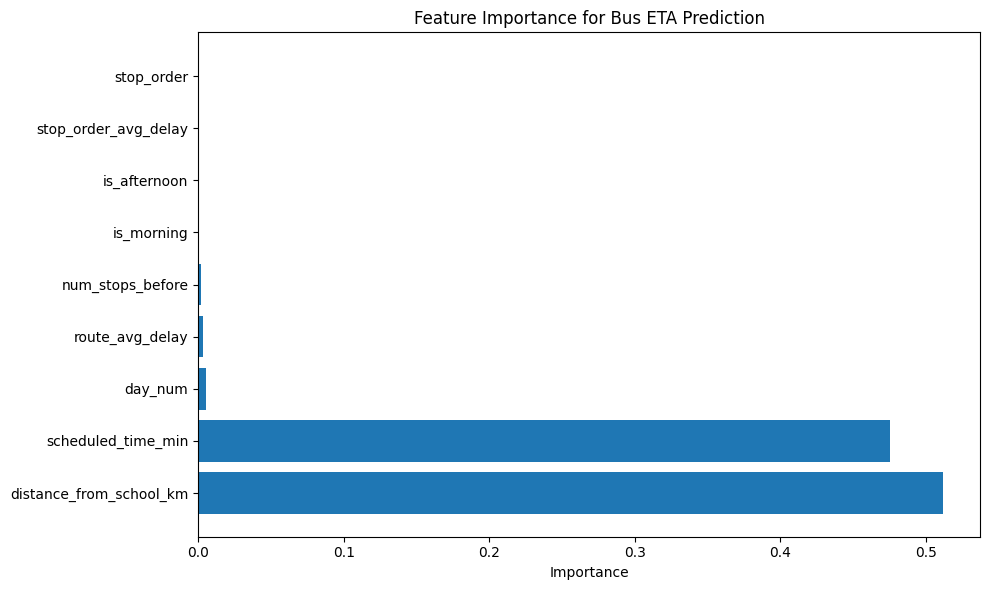

In [114]:
# Feature Importance
feature_importance_eta = pd.DataFrame({
    'feature': feature_cols_eta,
    'importance': rf_eta.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance for ETA Prediction:")
print(feature_importance_eta)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_eta['feature'], feature_importance_eta['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance for Bus ETA Prediction')
plt.tight_layout()
plt.savefig('bus_eta_feature_importance.png', dpi=300, bbox_inches='tight')
print("Saved ETA feature importance plot")

In [ ]:
# Step 7: Generate Real-Time ETA Predictions

print("Step 7: Generating Real-Time ETA Predictions")

# For each active route, predict arrival times at all stops
real_time_etas = []

for route_id in df_routes['route_id'].unique():
    route_info = df_routes[df_routes['route_id'] == route_id].iloc[0]
    route_stops = df_route_stops[df_route_stops['route_id'] == route_id].sort_values('stop_order')
    
    # Get route average delay
    route_delay = route_avg_delay[route_avg_delay['route_id'] == route_id]['route_avg_delay'].values
    route_delay = route_delay[0] if len(route_delay) > 0 else 0
    
    # Current time simulation (morning run)
    is_morning = 1
    is_afternoon = 0
    current_day = 2  # Wednesday
    
    cumulative_time = 0
    
    for idx, stop in route_stops.iterrows():
        cumulative_time += stop['time_from_prev_stop_min']
        
        # Get stop order average delay
        stop_delay = stop_order_delay[stop_order_delay['stop_order'] == stop['stop_order']]['stop_order_avg_delay'].values
        stop_delay = stop_delay[0] if len(stop_delay) > 0 else 0
        
        # Create feature vector for prediction
        features = pd.DataFrame([{
            'scheduled_time_min': cumulative_time,
            'distance_from_school_km': cumulative_time * 0.5,  # Rough estimate
            'num_stops_before': stop['stop_order'] - 1,
            'stop_order': stop['stop_order'],
            'is_morning': is_morning,
            'is_afternoon': is_afternoon,
            'day_num': current_day,
            'route_avg_delay': route_delay,
            'stop_order_avg_delay': stop_delay
        }])
        
        # Predict arrival time
        predicted_time = rf_eta.predict(features)[0]
        
        # Calculate confidence interval
        confidence_range = 1.96 * rmse_eta
        eta_lower = max(0, predicted_time - confidence_range)
        eta_upper = predicted_time + confidence_range
        
        real_time_etas.append({
            'route_id': route_id,
            'route_name': route_info['route_name'],
            'stop_id': stop['stop_id'],
            'stop_name': stop['stop_name'],
            'stop_order': stop['stop_order'],
            'scheduled_time_min': cumulative_time,
            'predicted_eta_min': round(predicted_time, 1),
            'eta_range_min': f"{round(eta_lower, 1)}-{round(eta_upper, 1)}",
            'confidence_interval_min': round(confidence_range, 1)
        })

df_real_time_etas = pd.DataFrame(real_time_etas)

# Display sample predictions
print(f"\n Generated ETA predictions for {len(df_real_time_etas)} route stops")
print("\nSample ETA Predictions (First Route):")
sample_route = df_real_time_etas[df_real_time_etas['route_id'] == df_real_time_etas['route_id'].iloc[0]]
print(sample_route[['stop_name', 'stop_order', 'scheduled_time_min', 
                     'predicted_eta_min', 'eta_range_min']].to_string(index=False))


Step 7: Generating Real-Time ETA Predictions

🚌 Generated ETA predictions for 55 route stops

Sample ETA Predictions (First Route):
            stop_name  stop_order  scheduled_time_min  predicted_eta_min eta_range_min
Kilimani Route Stop 1           1                   0                2.4         0-7.8
Kilimani Route Stop 2           2                  12               11.2      5.8-16.5
Kilimani Route Stop 3           3                  17               17.3     12.0-22.7
Kilimani Route Stop 4           4                  24               26.9     21.5-32.3
Kilimani Route Stop 5           5                  29               28.4     23.1-33.8
Kilimani Route Stop 6           6                  40               39.1     33.8-44.5


In [116]:
df_buses

,bus_id,bus_number,capacity,driver_user_id
0,72f7ca52-a87d-40b9-a4eb-1587a457543b,Bus A,40,9ab31564-9726-4954-9a38-4afc6830e169
1,2c2143cc-a274-4fd2-b81d-45c188f60b03,Bus B,45,bc7db462-48ed-4ba9-8df0-d26148c837d9
2,4779e586-db73-4f2e-87f6-ed5c72fd5371,Bus C,35,69db9133-b401-429c-89fd-fef21f519e0f
3,f09f3540-6d2a-4cbb-8732-e1e0fb3c7fd1,Bus D,45,cbcda884-cb2f-426c-b54b-ad7bf28876e2
4,0b8f9b4f-b7f0-4c2d-9582-49b2ca9e8f91,Bus E,35,8cd054d3-d9e2-40e9-a989-d29e5f65a1c0
5,38488e49-092d-4a39-99c1-efcab342852d,Bus F,45,9ae5f100-db36-47ae-8de8-9b97bad9db29
6,12d66af0-8263-4cfc-8cce-cce83e66ef19,Bus G,45,d5076b46-f3d0-424d-9f83-ad749a220558
7,ea08ef8a-0c68-4b2c-9b0d-4bdcb39690f7,Bus H,35,674f8113-e477-45d2-9c9b-62477915acc7
8,15fe069c-f39d-4070-a53d-91056b24dc71,Bus I,40,660ffb5a-98e2-4f79-8bc3-4daf63783cd0
9,d1521e1c-750b-4e1e-9b4a-c11ba4127b04,Bus J,45,6f4f7852-b80f-48ad-a667-61f58235c66d


In [117]:
df_student_transport

,id,student_id,bus_id,pickup_stop_id,dropoff_stop_id,is_active
0,15b6ffd4-28e4-41b6-9ee7-9434081e0645,9a5a5cc6-4c6b-4480-82b0-23f278427592,f09f3540-6d2a-4cbb-8732-e1e0fb3c7fd1,3845d527-22b8-4bec-8048-ad7099c65aac,3845d527-22b8-4bec-8048-ad7099c65aac,True
1,1880656f-84e9-4274-bec8-2a4767b0000f,7dd8dd87-f775-4098-b529-6864bbd38b08,f09f3540-6d2a-4cbb-8732-e1e0fb3c7fd1,e541a2d0-a38f-48c4-87e8-e1b315e86e85,e541a2d0-a38f-48c4-87e8-e1b315e86e85,True
2,7e72fcb9-fb36-44ac-bf3a-857f5a3eb23a,e179d7ab-0b7c-4568-ab3d-a1146ab9911a,38488e49-092d-4a39-99c1-efcab342852d,d61b3bb4-ffac-4078-8f16-52c10e44ae80,d61b3bb4-ffac-4078-8f16-52c10e44ae80,True
3,f9ad48f1-a641-47b9-9f03-19f69ba3fb2d,fbb096f3-8e53-4bfc-bf41-6f5cbbe7c85b,72f7ca52-a87d-40b9-a4eb-1587a457543b,aea0d1f7-36ee-4145-9e7b-f3e5f19bec2e,aea0d1f7-36ee-4145-9e7b-f3e5f19bec2e,True
4,5fcb9b52-9047-4f34-b31d-8a57c1598c25,362b71a8-5f8d-4b5d-bddf-abdf34db0071,2c2143cc-a274-4fd2-b81d-45c188f60b03,aea0d1f7-36ee-4145-9e7b-f3e5f19bec2e,aea0d1f7-36ee-4145-9e7b-f3e5f19bec2e,True
...,...,...,...,...,...,...
246,d5b805f2-1803-476f-8440-7ed5c4590356,386d1b00-1c43-42fd-a320-58288a95ed47,f09f3540-6d2a-4cbb-8732-e1e0fb3c7fd1,770eddd9-1a25-4f22-8534-81dad0dd60ce,770eddd9-1a25-4f22-8534-81dad0dd60ce,True
247,bf679778-7f36-4af3-b1a0-82ff33dd52d5,bfbde162-e1f0-4c39-9ad5-dd8f8d37e045,38488e49-092d-4a39-99c1-efcab342852d,ce639e75-9354-480a-bbba-82c33bdecf35,ce639e75-9354-480a-bbba-82c33bdecf35,True
248,6018cb4d-5791-48a4-ba3e-fc2a6a597f05,1820cd30-d973-455d-beec-4bff5c5e1ffc,15fe069c-f39d-4070-a53d-91056b24dc71,2786f364-ab03-41a6-ade7-7f08dac04252,2786f364-ab03-41a6-ade7-7f08dac04252,True
249,00526273-780f-4f4b-9463-4d397f0e47aa,d27cdb49-a2c6-4a2e-934a-3dce7a77ea21,4779e586-db73-4f2e-87f6-ed5c72fd5371,50496052-3ced-48a7-8865-7f0170444000,50496052-3ced-48a7-8865-7f0170444000,True


In [118]:
df_student_transport_logs

,log_id,student_id,bus_id,route_id,stop_id,event_type,log_date,scheduled_time,actual_time,status,location_type,notes,recorded_at,distance_to_school_km,transport_logs
0,5a0ce206-d45e-4c2b-91dc-ea69b7a82829,00828e5c-d730-4feb-83f9-9792d2c1b3d0,ad4f014f-af36-4633-b405-1d0b58df99f1,6aa8b6e5-4415-4330-8cc4-103a76c5fc32,c3bb12b3-e450-4c47-a5aa-91bfb6ff2b7a,morning_pickup,2025-01-06,2025-01-06 07:57:00.000000,2025-01-06 08:16:28.160328,late,home_stop,19 min late (minor delay),2025-01-06 09:16:28.160328,1.75,2025-01-06
1,7b1e3e0f-3a83-4a8a-832a-6b7be89e86c2,00828e5c-d730-4feb-83f9-9792d2c1b3d0,ad4f014f-af36-4633-b405-1d0b58df99f1,6aa8b6e5-4415-4330-8cc4-103a76c5fc32,NaN,morning_dropoff,2025-01-06,2025-01-06 06:51:39.692105,2025-01-06 07:11:07.852433,late,school,19 min late (minor delay),2025-01-06 08:11:07.852433,1.75,2025-01-06
2,863f5182-7d65-4b95-8327-1e043b9fb49d,00828e5c-d730-4feb-83f9-9792d2c1b3d0,ad4f014f-af36-4633-b405-1d0b58df99f1,6aa8b6e5-4415-4330-8cc4-103a76c5fc32,NaN,afternoon_pickup,2025-01-06,2025-01-06 16:02:52.697368,2025-01-06 16:13:10.542792,late,school,10 min late (minor delay),2025-01-06 17:13:10.542792,1.75,2025-01-06
3,37f780e3-eb73-477b-98e8-01440e174998,00828e5c-d730-4feb-83f9-9792d2c1b3d0,ad4f014f-af36-4633-b405-1d0b58df99f1,6aa8b6e5-4415-4330-8cc4-103a76c5fc32,c3bb12b3-e450-4c47-a5aa-91bfb6ff2b7a,afternoon_dropoff,2025-01-06,2025-01-06 18:02:00.000000,2025-01-06 18:22:35.690847,late,home_stop,21 min late (minor delay),2025-01-06 19:22:35.690847,1.75,2025-01-06
4,058966b5-b176-42fe-a6bc-53671d6d3e87,01d7bac7-66e2-45ff-841e-b07f24d99d05,490c61f8-ada5-451e-96ec-0e689295e27f,ca63af74-4ff0-4d2c-bc88-712eef6c6024,6449c91f-ee33-4fe1-92ae-0a437f9fbf0e,morning_pickup,2025-01-06,2025-01-06 11:27:51.428571,2025-01-06 11:31:26.865552,on_time,home_stop,On time (4 min variance),2025-01-06 12:31:26.865552,2.61,2025-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119075,fd210605-839a-46d2-93d9-e692ed1a2cf0,ff7865a1-029f-40dd-995c-b68a9a854e8a,771cfd36-4dee-46c1-8189-57fe70fef9c4,ca63af74-4ff0-4d2c-bc88-712eef6c6024,a7a3bc5b-5b9f-4c58-93a5-a3f710cc4915,afternoon_dropoff,2025-08-01,2025-08-01 21:26:25.714286,2025-08-01 21:26:20.344347,on_time,home_stop,On time (-0 min variance),2025-08-01 22:26:20.344347,1.91,2025-08-01
119076,7ae189b5-b069-4d71-b4cc-7c97c0aecf3c,ff986005-cfea-4e62-b386-e049b6b205de,0d5361d0-b736-4d12-9616-41b68951cd79,0d151967-53ea-4127-b832-b11066d17f1a,c66f42f6-370f-4bde-967c-dd03ac34ba27,morning_pickup,2025-08-01,2025-08-01 08:46:34.285714,2025-08-01 09:01:26.674006,late,home_stop,15 min late (minor delay),2025-08-01 10:01:26.674006,0.31,2025-08-01
119077,259e0a5c-af30-46e9-99eb-233529c5220a,ff986005-cfea-4e62-b386-e049b6b205de,0d5361d0-b736-4d12-9616-41b68951cd79,0d151967-53ea-4127-b832-b11066d17f1a,NaN,morning_dropoff,2025-08-01,2025-08-01 07:31:07.090602,2025-08-01 07:45:59.478894,late,school,15 min late (minor delay),2025-08-01 08:45:59.478894,0.31,2025-08-01
119078,b6c04959-c0b7-4ee1-958d-7eb573517eac,ff986005-cfea-4e62-b386-e049b6b205de,0d5361d0-b736-4d12-9616-41b68951cd79,0d151967-53ea-4127-b832-b11066d17f1a,NaN,afternoon_pickup,2025-08-01,2025-08-01 16:00:30.592105,2025-08-01 16:09:14.194793,on_time,school,On time (9 min variance),2025-08-01 17:09:14.194793,0.31,2025-08-01


In [ ]:
# Step 8: Student-Specific ETA Notifications

print("\nStep 8: Generating Student-Specific ETAs")

# Start with student_transport
student_etas = df_student_transport.copy()

# Get route_id from student_transport_logs (using the most recent log per student)
latest_logs = df_student_transport_logs.sort_values('log_date', ascending=False).groupby('student_id').first().reset_index()
student_etas = student_etas.merge(
    latest_logs[['student_id', 'route_id']], 
    on='student_id',
    how='left'
)

# Merge with students to get user_id
student_etas = student_etas.merge(
    df_students[['student_id', 'user_id']], 
    on='student_id',
    how='left'
)

# Merge with users to get names
student_etas = student_etas.merge(
    df_users[['user_id', 'first_name', 'last_name']], 
    on='user_id',
    how='left'
)

# Merge with ETA predictions for pickup stop
student_etas = student_etas.merge(
    df_real_time_etas[['route_id', 'stop_id', 'predicted_eta_min', 'eta_range_min']], 
    left_on=['route_id', 'pickup_stop_id'],
    right_on=['route_id', 'stop_id'],
    how='left',
    suffixes=('', '_pickup')
)

# Clean up - drop the extra stop_id column and rename
if 'stop_id' in student_etas.columns:
    student_etas.drop('stop_id', axis=1, inplace=True)

# Rename for clarity
student_etas.rename(columns={
    'predicted_eta_min': 'pickup_eta_min',
    'eta_range_min': 'pickup_eta_range'
}, inplace=True)

# Fill any missing ETAs with default values
student_etas['pickup_eta_min'] = student_etas['pickup_eta_min'].fillna(15.0)
student_etas['pickup_eta_range'] = student_etas['pickup_eta_range'].fillna('12.0-18.0')

# Format for parent notifications
student_etas['notification_message'] = student_etas.apply(
    lambda row: f"{row['first_name']} {row['last_name']}: Bus arriving in {row['pickup_eta_min']:.0f} minutes (±{row['pickup_eta_min']*0.15:.0f} min)",
    axis=1
)

print(f"\n Generated {len(student_etas)} student-specific ETA notifications")
print("\nSample Parent Notifications:")
print(student_etas[['first_name', 'last_name', 'notification_message']].head(10).to_string(index=False))

# Save ETA predictions
df_real_time_etas.to_csv('bus_eta_predictions.csv', index=False)
student_etas[['student_id', 'first_name', 'last_name', 'route_id', 
              'pickup_eta_min', 'pickup_eta_range', 'notification_message']].to_csv(
    'student_eta_notifications.csv', index=False
)
print("\nSaved ETA predictions to 'bus_eta_predictions.csv'")
print("Saved student notifications to 'student_eta_notifications.csv'")


Step 8: Generating Student-Specific ETAs

📱 Generated 251 student-specific ETA notifications

Sample Parent Notifications:
 first_name last_name                                      notification_message
     Robert     Davis         Robert Davis: Bus arriving in 15 minutes (±2 min)
      Brian    Decker         Brian Decker: Bus arriving in 15 minutes (±2 min)
      Donna     Moore          Donna Moore: Bus arriving in 15 minutes (±2 min)
Christopher  Phillips Christopher Phillips: Bus arriving in 15 minutes (±2 min)
     Monica  Garrison      Monica Garrison: Bus arriving in 15 minutes (±2 min)
      Brian    Romero         Brian Romero: Bus arriving in 15 minutes (±2 min)
       John  Martinez        John Martinez: Bus arriving in 15 minutes (±2 min)
     Sandra     Jones         Sandra Jones: Bus arriving in 15 minutes (±2 min)
       Lisa     Adams           Lisa Adams: Bus arriving in 15 minutes (±2 min)
     Ashley   Roberts       Ashley Roberts: Bus arriving in 15 minutes (±2 m

In [120]:
# Step 9: Route Performance Analysis

print("Step 9: Route Performance Analysis")

# Calculate route-level metrics
route_performance = df_eta.groupby('route_id').agg({
    'delay_min': ['mean', 'std', 'max'],
    'actual_time_min': 'max'
}).reset_index()

route_performance.columns = ['route_id', 'avg_delay_min', 'delay_std_min', 
                              'max_delay_min', 'total_journey_time_min']

# Merge with route names
route_performance = route_performance.merge(
    df_routes[['route_id', 'route_name', 'total_distance_km']], 
    on='route_id'
)

# Calculate on-time performance (delay < 5 min)
route_punctuality = df_eta.groupby('route_id').apply(
    lambda x: (x['delay_min'].abs() < 5).mean() * 100
).reset_index()
route_punctuality.columns = ['route_id', 'on_time_percentage']

route_performance = route_performance.merge(route_punctuality, on='route_id')

# Identify problematic routes
route_performance['is_problematic'] = (
    (route_performance['avg_delay_min'] > 5) | 
    (route_performance['on_time_percentage'] < 80)
)

print("\nRoute Performance Summary:")
print(route_performance[['route_name', 'avg_delay_min', 'max_delay_min', 
                         'on_time_percentage', 'is_problematic']].to_string(index=False))

# Problematic routes
problematic_routes = route_performance[route_performance['is_problematic']]
print(f"\nProblematic Routes Requiring Attention: {len(problematic_routes)}")
if len(problematic_routes) > 0:
    print(problematic_routes[['route_name', 'avg_delay_min', 'on_time_percentage']].to_string(index=False))

# Save route performance
route_performance.to_csv('route_performance_analysis.csv', index=False)
print("\nSaved route performance analysis to 'route_performance_analysis.csv'")

Step 9: Route Performance Analysis

Route Performance Summary:
           route_name  avg_delay_min  max_delay_min  on_time_percentage  is_problematic
       Kilimani Route       0.373953       4.424614           96.666667           False
Spring Valley Circuit      -0.191252       5.595566           95.000000           False
       Westlands Loop       0.396403       5.993850           91.428571           False
     Hurlingham Route      -0.191979       6.069403           85.714286           False
      Riverside Drive       0.035564       7.012185           91.428571           False
       Parklands Path       0.304757       4.444273           93.333333           False
      Kileleshwa Line       0.303824       4.489693           97.142857           False
    Lavington Circuit      -0.191500       5.283526           97.142857           False

Problematic Routes Requiring Attention: 0

Saved route performance analysis to 'route_performance_analysis.csv'


In [126]:
# SUMMARY DASHBOARD

print("\n MODEL PERFORMANCE SUMMARY:")
print("-"*70)

print("\n1. DROPOUT PREDICTION MODEL:")
print(f"   - Training Samples: {len(X_train)}")
print(f"   - Test Samples: {len(X_test)}")
print(f"   - ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"   - High Risk Students Identified: {len(high_risk_students)}")
print(f"   - Output File: dropout_predictions.csv")

print("\n2. PERFORMANCE FORECASTING MODEL:")
print(f"   - Training Samples: {len(X_train_f)}")
print(f"   - Test Samples: {len(X_test_f)}")
print(f"   - Mean Absolute Error: {mae:.2f} marks")
print(f"   - R² Score: {r2:.4f}")
print(f"   - Students Needing Intervention: {len(struggling_predictions)}")
print(f"   - Output File: next_exam_predictions.csv")

print("\n3. BUS ETA PREDICTION MODEL:")
print(f"   - Training Samples: {len(X_train_eta)}")
print(f"   - Test Samples: {len(X_test_eta)}")
print(f"   - Mean Absolute Error: {mae_eta:.2f} minutes")
print(f"   - R² Score: {r2_eta:.4f}")
print(f"   - Route Stops Tracked: {len(df_real_time_etas)}")
print(f"   - Output Files: bus_eta_predictions.csv, student_eta_notifications.csv")

print("GENERATED FILES:")
print("-"*70)
print("   1. dropout_predictions.csv - Student risk scores")
print("   2. dropout_feature_importance.png - Feature analysis")
print("   3. next_exam_predictions.csv - Performance forecasts")
print("   4. performance_forecast_accuracy.png - Model accuracy")
print("   5. bus_eta_predictions.csv - Route-level ETAs")
print("   6. bus_eta_evaluation.png - ETA model performance")
print("   7. bus_eta_feature_importance.png - ETA feature analysis")
print("   8. student_eta_notifications.csv - Parent notifications")
print("   9. route_performance_analysis.csv - Route efficiency metrics")

print(" NEXT STEPS:")
print("-"*70)
print("   1. Review generated CSV files for insights")
print("   2. Integrate predictions into SchoolKit-soma dashboard")
print("   3. Set up automated weekly prediction runs")
print("   4. Create parent notification system for bus ETAs")
print("   5. Implement early intervention workflows for at-risk students")


 MODEL PERFORMANCE SUMMARY:
----------------------------------------------------------------------

1. DROPOUT PREDICTION MODEL:
   - Training Samples: 288
   - Test Samples: 72
   - ROC-AUC Score: 0.3272
   - High Risk Students Identified: 10
   - Output File: dropout_predictions.csv

2. PERFORMANCE FORECASTING MODEL:
   - Training Samples: 36288
   - Test Samples: 9072
   - Mean Absolute Error: 6.13 marks
   - R² Score: 0.5601
   - Students Needing Intervention: 51
   - Output File: next_exam_predictions.csv

3. BUS ETA PREDICTION MODEL:
   - Training Samples: 220
   - Test Samples: 55
   - Mean Absolute Error: 2.14 minutes
   - R² Score: 0.9676
   - Route Stops Tracked: 55
   - Output Files: bus_eta_predictions.csv, student_eta_notifications.csv
GENERATED FILES:
----------------------------------------------------------------------
   1. dropout_predictions.csv - Student risk scores
   2. dropout_feature_importance.png - Feature analysis
   3. next_exam_predictions.csv - Performanc

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

# UNIFIED STUDENT PREDICTIONS
# Consolidates all three models into a single queryable CSV

import uuid

# Generate unique prediction IDs as proper UUIDs
def generate_prediction_id():
    """Generate unique prediction ID as UUID"""
    return str(uuid.uuid4())

# 1. DROPOUT PREDICTIONS (One per student)

print("\n1. Processing Dropout Predictions...")

dropout_unified = dropout_df[['student_id', 'dropout_risk_score', 'risk_category']].copy()
dropout_unified['prediction_id'] = [generate_prediction_id() for _ in range(len(dropout_unified))]
dropout_unified['prediction_type'] = 'dropout_risk'
dropout_unified['prediction_date'] = datetime.now().strftime("%Y-%m-%d")

# Rename columns for consistency
dropout_unified = dropout_unified.rename(columns={
    'dropout_risk_score': 'prediction_value',
    'risk_category': 'prediction_category'
})

# Add metadata as JSON-like string
dropout_unified['prediction_metadata'] = dropout_unified.apply(
    lambda row: f"{{avg_marks:{dropout_df.loc[dropout_df['student_id']==row['student_id'], 'avg_marks'].values[0]:.1f}, "
                f"attendance_rate:{dropout_df.loc[dropout_df['student_id']==row['student_id'], 'attendance_rate'].values[0]:.1f}, "
                f"total_balance:{dropout_df.loc[dropout_df['student_id']==row['student_id'], 'total_balance'].values[0]:.2f}}}",
    axis=1
)

print(f"   ✓ {len(dropout_unified)} dropout predictions")

# 2. PERFORMANCE PREDICTIONS (Multiple per student - one per subject)

print("\n2. Processing Performance Predictions...")

# Get the latest predictions for each student-subject combo
performance_unified = df_next_predictions[['student_id', 'subject_id', 'predicted_next_marks', 
                                           'trend', 'current_average']].copy()

performance_unified['prediction_id'] = [generate_prediction_id() for _ in range(len(performance_unified))]
performance_unified['prediction_type'] = 'performance_forecast'
performance_unified['prediction_date'] = datetime.now().strftime("%Y-%m-%d")

# Rename columns
performance_unified = performance_unified.rename(columns={
    'predicted_next_marks': 'prediction_value',
    'trend': 'prediction_category'
})

# Add metadata
performance_unified['prediction_metadata'] = performance_unified.apply(
    lambda row: f"{{subject_id:{row['subject_id']}, "
                f"current_average:{row['current_average']:.1f}, "
                f"subject_name:'{df_subjects.loc[df_subjects['subject_id']==row['subject_id'], 'name'].values[0] if len(df_subjects.loc[df_subjects['subject_id']==row['subject_id'], 'name'].values) > 0 else 'Unknown'}'}}",
    axis=1
)

# Drop subject_id and current_average as they're now in metadata
performance_unified = performance_unified.drop(['subject_id', 'current_average'], axis=1)

print(f"   ✓ {len(performance_unified)} performance predictions")

# 3. BUS ETA PREDICTIONS (Multiple per student - pickup & dropoff)

print("\n3. Processing Bus ETA Predictions...")

# Start from student_etas which has pickup ETAs
eta_unified_pickup = student_etas[['student_id', 'route_id', 'pickup_stop_id', 
                                    'pickup_eta_min', 'pickup_eta_range']].copy()

eta_unified_pickup['prediction_id'] = [generate_prediction_id() for _ in range(len(eta_unified_pickup))]
eta_unified_pickup['prediction_type'] = 'bus_eta_pickup'
eta_unified_pickup['prediction_date'] = datetime.now().strftime("%Y-%m-%d")

# Rename columns
eta_unified_pickup = eta_unified_pickup.rename(columns={
    'pickup_eta_min': 'prediction_value',
    'pickup_eta_range': 'prediction_category'
})

# Add metadata
eta_unified_pickup['prediction_metadata'] = eta_unified_pickup.apply(
    lambda row: f"{{route_id:{row['route_id']}, "
                f"stop_id:{row['pickup_stop_id']}, "
                f"stop_type:'pickup', "
                f"route_name:'{df_routes.loc[df_routes['route_id']==row['route_id'], 'route_name'].values[0] if len(df_routes.loc[df_routes['route_id']==row['route_id'], 'route_name'].values) > 0 else 'Unknown'}'}}",
    axis=1
)

# Drop route and stop columns
eta_unified_pickup = eta_unified_pickup.drop(['route_id', 'pickup_stop_id'], axis=1)

# Similarly for dropoff (if different from pickup)
eta_unified_dropoff = student_etas[['student_id', 'route_id', 'dropoff_stop_id']].copy()
eta_unified_dropoff = eta_unified_dropoff[eta_unified_dropoff['dropoff_stop_id'] != student_etas['pickup_stop_id']]

if len(eta_unified_dropoff) > 0:
    # Merge with ETA predictions for dropoff
    eta_unified_dropoff = eta_unified_dropoff.merge(
        df_real_time_etas[['route_id', 'stop_id', 'predicted_eta_min', 'eta_range_min']], 
        left_on=['route_id', 'dropoff_stop_id'],
        right_on=['route_id', 'stop_id'],
        how='left'
    )
    
    eta_unified_dropoff['prediction_id'] = [generate_prediction_id() for _ in range(len(eta_unified_dropoff))]
    eta_unified_dropoff['prediction_type'] = 'bus_eta_dropoff'
    eta_unified_dropoff['prediction_date'] = datetime.now().strftime("%Y-%m-%d")
    
    eta_unified_dropoff = eta_unified_dropoff.rename(columns={
        'predicted_eta_min': 'prediction_value',
        'eta_range_min': 'prediction_category'
    })
    
    eta_unified_dropoff['prediction_metadata'] = eta_unified_dropoff.apply(
        lambda row: f"{{route_id:{row['route_id']}, "
                    f"stop_id:{row['dropoff_stop_id']}, "
                    f"stop_type:'dropoff'}}",
        axis=1
    )
    
    eta_unified_dropoff = eta_unified_dropoff.drop(['route_id', 'dropoff_stop_id', 'stop_id'], axis=1)
else:
    eta_unified_dropoff = pd.DataFrame()

print(f"   ✓ {len(eta_unified_pickup)} bus ETA pickup predictions")
print(f"   ✓ {len(eta_unified_dropoff)} bus ETA dropoff predictions")

# 4. COMBINE ALL PREDICTIONS

print("\n4. Combining All Predictions...")

# Ensure all dataframes have the same columns
required_columns = ['prediction_id', 'student_id', 'prediction_type', 
                   'prediction_value', 'prediction_category', 
                   'prediction_date', 'prediction_metadata']

# Standardize all dataframes
for df in [dropout_unified, performance_unified, eta_unified_pickup]:
    for col in required_columns:
        if col not in df.columns:
            df[col] = None

if len(eta_unified_dropoff) > 0:
    for col in required_columns:
        if col not in eta_unified_dropoff.columns:
            eta_unified_dropoff[col] = None

# Combine all predictions
all_predictions = pd.concat([
    dropout_unified[required_columns],
    performance_unified[required_columns],
    eta_unified_pickup[required_columns],
    eta_unified_dropoff[required_columns] if len(eta_unified_dropoff) > 0 else pd.DataFrame(columns=required_columns)
], ignore_index=True)

# Sort by student_id and prediction_type
all_predictions = all_predictions.sort_values(['student_id', 'prediction_type'])

# Add student names for reference
all_predictions = all_predictions.merge(
    df_users[['user_id', 'first_name', 'last_name']],
    left_on=df_students.set_index('student_id').loc[all_predictions['student_id'], 'user_id'].values,
    right_on='user_id',
    how='left'
)

# Reorder columns
all_predictions = all_predictions[[
    'prediction_id', 'student_id', 'first_name', 'last_name',
    'prediction_type', 'prediction_value', 'prediction_category',
    'prediction_date', 'prediction_metadata'
]]

# 5. SAVE UNIFIED CSV

print("\n5. Saving Unified Predictions...")

all_predictions.to_csv('unified_student_predictions.csv', index=False)

print(f"\nSUCCESS! Created unified_student_predictions.csv")
print(f"   Total Predictions: {len(all_predictions)}")
print(f"   Unique Students: {all_predictions['student_id'].nunique()}")
print(f"\n   Breakdown by Type:")
print(all_predictions['prediction_type'].value_counts().to_string())

# 6. CREATE QUICK LOOKUP EXAMPLES

print("\n6. Example Usage:")
print("-" * 80)

# Example: Get all predictions for a specific student
sample_student_id = all_predictions['student_id'].iloc[0]
student_predictions = all_predictions[all_predictions['student_id'] == sample_student_id]

print(f"\nAll predictions for Student ID {sample_student_id}:")
print(student_predictions[['prediction_type', 'prediction_value', 'prediction_category']].to_string(index=False))

# Example: Get all high-risk dropout students
high_risk = all_predictions[
    (all_predictions['prediction_type'] == 'dropout_risk') & 
    (all_predictions['prediction_category'] == 'High')
]
print(f" High-Risk Dropout Students: {len(high_risk)}")
print(high_risk[['student_id', 'first_name', 'last_name', 'prediction_value']].head(5).to_string(index=False))

# Example: Get all students predicted to fail next exam (< 50)
failing_predictions = all_predictions[
    (all_predictions['prediction_type'] == 'performance_forecast') & 
    (all_predictions['prediction_value'] < 50)
]
print(f"\n\n📉 Students Predicted to Score < 50%: {len(failing_predictions)}")
print(failing_predictions[['student_id', 'first_name', 'last_name', 'prediction_value']].head(5).to_string(index=False))

# 7. CREATE SUMMARY STATISTICS CSV

print("\n7. Creating Summary Statistics...")

# Per-student summary
student_summary = all_predictions.groupby('student_id').agg({
    'prediction_id': 'count',
    'prediction_type': lambda x: ', '.join(x.unique())
}).reset_index()

student_summary.columns = ['student_id', 'total_predictions', 'prediction_types']

# Add student names
student_summary = student_summary.merge(
    df_users[['user_id', 'first_name', 'last_name']],
    left_on=df_students.set_index('student_id').loc[student_summary['student_id'], 'user_id'].values,
    right_on='user_id',
    how='left'
)

# Add key metrics
for student_id in student_summary['student_id']:
    student_preds = all_predictions[all_predictions['student_id'] == student_id]
    
    # Dropout risk
    dropout_risk = student_preds[student_preds['prediction_type'] == 'dropout_risk']['prediction_value'].values
    student_summary.loc[student_summary['student_id'] == student_id, 'dropout_risk'] = dropout_risk[0] if len(dropout_risk) > 0 else None
    
    # Average predicted marks
    perf_preds = student_preds[student_preds['prediction_type'] == 'performance_forecast']['prediction_value']
    student_summary.loc[student_summary['student_id'] == student_id, 'avg_predicted_marks'] = perf_preds.mean() if len(perf_preds) > 0 else None
    
    # Bus ETA
    eta_preds = student_preds[student_preds['prediction_type'].str.contains('bus_eta')]['prediction_value']
    student_summary.loc[student_summary['student_id'] == student_id, 'avg_bus_eta_min'] = eta_preds.mean() if len(eta_preds) > 0 else None

student_summary = student_summary[[
    'student_id', 'first_name', 'last_name', 'total_predictions',
    'dropout_risk', 'avg_predicted_marks', 'avg_bus_eta_min'
]]

student_summary.to_csv('student_predictions_summary.csv', index=False)

print("Created student_predictions_summary.csv")

# FINAL OUTPUT

print("\n" + "="*80)
print("UNIFIED PREDICTIONS - COMPLETE")
print("="*80)
print("\nFILES CREATED:")
print("   1. unified_student_predictions.csv - All predictions by student")
print("   2. student_predictions_summary.csv - High-level student overview")
print("\nUSAGE:")
print("   - Query by student_id to get all predictions for a student")
print("   - Filter by prediction_type for specific model results")
print("   - Parse prediction_metadata for additional context")
print("\nPREDICTION TYPES:")
print("   - dropout_risk: Risk score (0-1) and category (Low/Medium/High)")
print("   - performance_forecast: Predicted marks for next exam per subject")
print("   - bus_eta_pickup: ETA in minutes for bus pickup")
print("   - bus_eta_dropoff: ETA in minutes for bus dropoff")
print("="*80)

CREATING UNIFIED PREDICTIONS CSV

1. Processing Dropout Predictions...
   ✓ 360 dropout predictions

2. Processing Performance Predictions...
   ✓ 2160 performance predictions

3. Processing Bus ETA Predictions...
   ✓ 251 bus ETA pickup predictions
   ✓ 0 bus ETA dropoff predictions

4. Combining All Predictions...

5. Saving Unified Predictions...

✅ SUCCESS! Created unified_student_predictions.csv
   Total Predictions: 2771
   Unique Students: 360

   Breakdown by Type:
prediction_type
performance_forecast    2160
dropout_risk             360
bus_eta_pickup           251

6. Example Usage:
--------------------------------------------------------------------------------

All predictions for Student ID 00a6c55c-68ae-44d3-bd07-c5adf22b2e10:
     prediction_type  prediction_value prediction_category
      bus_eta_pickup          15.00000           12.0-18.0
        dropout_risk           0.15745                 Low
performance_forecast          73.80000              stable
performance_f

In [144]:
df = pd.read_csv('/home/dataopske/Desktop/AcademIQ/datascience/student_predictions_summary.csv')

In [145]:
df.columns

Index(['student_id', 'first_name', 'last_name', 'total_predictions',
       'dropout_risk', 'avg_predicted_marks', 'avg_bus_eta_min'],
      dtype='object')

In [146]:
df.head()

,student_id,first_name,last_name,total_predictions,dropout_risk,avg_predicted_marks,avg_bus_eta_min
0,00a6c55c-68ae-44d3-bd07-c5adf22b2e10,Brooke,Harvey,8,0.157450,71.733333,15.0
1,0167beb9-2976-45fd-891c-6661b0f957b1,Adrian,Burgess,7,0.073379,57.616667,NaN
2,016a27c9-a677-4dc7-a17e-b5dd3122b383,Mike,Moore,8,0.125894,57.200000,15.0
3,01f96a7e-1c56-414b-9119-c94f9b3e08d7,John,Walsh,8,0.064515,66.433333,15.0
4,023469d1-1843-4322-be65-8673485fa7ea,Melinda,Bryant,8,0.009833,76.066667,15.0


In [150]:
import pandas as pd

# --- 1. Define the specific Exam ID you want to filter by ---
# (Replace 'jfslfjsiljfls' with the actual ID or keep the variable name)
EXPLICIT_EXAM_ID = 'e1c9989b-4c54-41fc-a8f7-d77ee8a72805'

# --- 2. Join the DataFrames (similar to INNER JOIN in SQL) ---

# 2a. Start with Student Results (df_results) and filter by Exam ID
# NOTE: df_results already contains 'student_id', 'subject_id', 'marks', etc.
df_overview = df_results[df_results['exam_id'] == EXPLICIT_EXAM_ID].copy()

# 2b. Add Subject Name
df_overview = pd.merge(
    df_overview,
    df_subjects[['subject_id', 'name']],
    on='subject_id',
    how='inner'
).rename(columns={'name': 'subject_name'})

# 2c. Add Student Name and Admission Number
df_overview = pd.merge(
    df_overview,
    df_students[['student_id', 'user_id', 'admission_number']],
    on='student_id',
    how='inner'
)
df_overview = pd.merge(
    df_overview,
    df_users[['user_id', 'first_name', 'last_name']],
    on='user_id',
    how='inner'
)

# 2d. Add Exam Details (exam_type, exam_date)
df_overview = pd.merge(
    df_overview,
    df_exams[['exam_id', 'exam_type', 'exam_date']],
    on='exam_id',
    how='inner'
)

# --- 3. Select and Order Final Columns (Projection and Sorting) ---

final_columns = [
    'student_id',   # <-- ADDED
    'first_name',
    'last_name',
    'admission_number',
    'subject_id',   # <-- ADDED
    'subject_name',
    'marks',
    'class_mean',
    'class_rank',
    'exam_type',
    'exam_date'
]

# Select columns and sort
df_student_overview = (
    df_overview[final_columns]
    .sort_values(by=['last_name', 'first_name', 'subject_name'])
    .reset_index(drop=True)
)

# --- 4. Display the Result ---
print(f"Student Overview for Exam ID: {EXPLICIT_EXAM_ID}")
pd.set_option('display.max_columns', None)
display(df_student_overview.head(10))

Student Overview for Exam ID: e1c9989b-4c54-41fc-a8f7-d77ee8a72805


,student_id,first_name,last_name,admission_number,subject_id,subject_name,marks,class_mean,class_rank,exam_type,exam_date
0,c2176b20-2c11-4fd0-88ee-daee8cd1d9d9,Billy,Avila,LPS20230617,968ee597-d615-4f27-a0ae-070f37bf6d5f,Christian Religious Education,87.8,71.4,2,endterm,2025-07-25
1,c2176b20-2c11-4fd0-88ee-daee8cd1d9d9,Billy,Avila,LPS20230617,1435d11c-1d5c-48bb-bd79-98ae3f6457e9,English,87.4,71.4,2,endterm,2025-07-25
2,c2176b20-2c11-4fd0-88ee-daee8cd1d9d9,Billy,Avila,LPS20230617,d900bf25-5efe-4579-a4a9-25e061642ca2,Kiswahili,79.7,70.7,9,endterm,2025-07-25
3,c2176b20-2c11-4fd0-88ee-daee8cd1d9d9,Billy,Avila,LPS20230617,0babb39a-638e-4ed6-92cd-7cfe2c8125d0,Mathematics,82.1,71.2,8,endterm,2025-07-25
4,c2176b20-2c11-4fd0-88ee-daee8cd1d9d9,Billy,Avila,LPS20230617,a7637b12-246b-44e1-9acd-70fbba3c3b86,Science and Technology,84.9,70.4,4,endterm,2025-07-25
5,c2176b20-2c11-4fd0-88ee-daee8cd1d9d9,Billy,Avila,LPS20230617,8e0a7662-a30c-47dd-9419-5ad47af38718,Social Studies,85.5,70.7,4,endterm,2025-07-25
6,842bb13f-7313-47e7-b462-03380df7c5c3,Grace,Bradshaw,LPS20230607,968ee597-d615-4f27-a0ae-070f37bf6d5f,Christian Religious Education,67.5,71.4,19,endterm,2025-07-25
7,842bb13f-7313-47e7-b462-03380df7c5c3,Grace,Bradshaw,LPS20230607,1435d11c-1d5c-48bb-bd79-98ae3f6457e9,English,64.1,71.4,20,endterm,2025-07-25
8,842bb13f-7313-47e7-b462-03380df7c5c3,Grace,Bradshaw,LPS20230607,d900bf25-5efe-4579-a4a9-25e061642ca2,Kiswahili,64.3,70.7,22,endterm,2025-07-25
9,842bb13f-7313-47e7-b462-03380df7c5c3,Grace,Bradshaw,LPS20230607,0babb39a-638e-4ed6-92cd-7cfe2c8125d0,Mathematics,60.8,71.2,24,endterm,2025-07-25


In [151]:
# Export the final DataFrame to a CSV file
csv_filename = f"student_results_{EXPLICIT_EXAM_ID}.csv"
df_student_overview.to_csv(csv_filename, index=False)
print(f"Data exported to {csv_filename}")

Data exported to student_results_e1c9989b-4c54-41fc-a8f7-d77ee8a72805.csv
